In [37]:
import pandas as pd
from plotnine import *
import numpy as np
import re

In [38]:
df = pd.read_csv('전국도시공원표준데이터.csv',encoding = "euc-kr",engine="python")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 18 columns):
관리번호            13135 non-null object
공원명             13135 non-null object
공원구분            13135 non-null object
소재지도로명주소        7237 non-null object
소재지지번주소         11931 non-null object
위도              13129 non-null float64
경도              13129 non-null float64
공원면적            13108 non-null object
공원보유시설(운동시설)    3556 non-null object
공원보유시설(유희시설)    4717 non-null object
공원보유시설(편익시설)    3463 non-null object
공원보유시설(교양시설)    753 non-null object
공원보유시설(기타시설)    2095 non-null object
지정고시일           11196 non-null object
관리기관명           12352 non-null object
전화번호            12210 non-null object
데이터기준일자         13135 non-null object
Unnamed: 17     0 non-null float64
dtypes: float64(3), object(15)
memory usage: 1.8+ MB


In [40]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,Unnamed: 17
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,NaN,NaN,NaN,NaN,NaN,1995-12-27,강원도 양구군청,033-480-2927,2018-02-28,NaN
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,NaN,NaN,NaN,NaN,NaN,2010-03-19,강원도 양구군청,033-480-2460,2018-02-28,NaN
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,NaN,NaN,NaN,NaN,NaN,2010-10-01,강원도 양구군청,033-480-2576,2018-02-28,NaN


In [41]:
df.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 17'], inplace=True)

In [42]:
# 시도와 구군 데이터 가져오기
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0]
df['구군'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]

In [43]:
# plotnine에 면적 표현용 데이터 만들기
df['공원면적'] = df['공원면적'].str.replace(',', '').astype(float)
df['공원면적그래프용'] = df['공원면적'].apply(lambda x : x * 0.0001)
df['공원면적그래프용'].head()

0     0.1597
1     0.1498
2     0.1499
3     1.8437
4    17.8931
Name: 공원면적그래프용, dtype: float64

C:\Users\USER\Anaconda\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\USER\Anaconda\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\USER\Anaconda\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


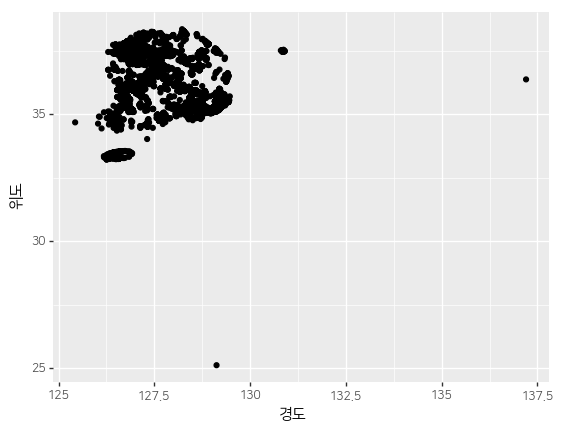

<ggplot: (-9223371994930115061)>

In [44]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumSquare'))
)

In [45]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 그래프 표현시 위경도가 NaN값이면 오류가 나니 제거해 줍니다. 
park_loc_notnull = df.loc[(df['위도'] > 32 ) & (df['경도'] < 132) & df['시도'].notnull()]
park_loc_notnull.shape

(7237, 13)

C:\Users\USER\Anaconda\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\USER\Anaconda\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\USER\Anaconda\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\USER\Anaconda\lib\site-packages\mizani\bounds.py:345: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
C:\Users\USER\Anaconda\lib\site-packages\mizani\bounds.py:345: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])


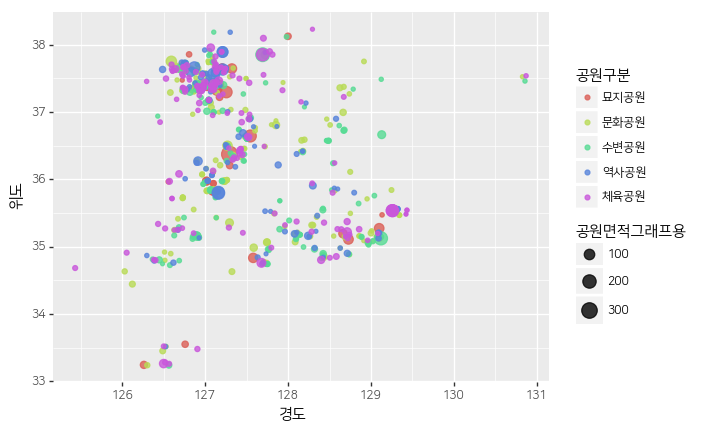

<ggplot: (41925946709)>

In [50]:
# 특정지역의 일부 공원만 보기
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = df.loc[df['공원구분'].str.match(park_type)]
(ggplot(gg_sample)
 + aes(x='경도', y='위도', color ='공원구분', size='공원면적그래프용')
 + geom_point(alpha = 0.8)
 + theme(text=element_text(family='NanumSquare'))
)